In [1]:
import os
from ultralytics import NAS
os.chdir("..")
ROOT = os.getcwd()
print(ROOT)


/Users/mautushid/github/Cowsformer


In [2]:
from models.nas import *
import pandas as pd
import matplotlib.pyplot as plt

The console stream is logged into /Users/mautushid/sg_logs/console.log


[2023-11-30 19:01:11] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2023-11-30 19:01:12] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-11-30 19:01:12] WARNING - redirects.py - NOTE: Redirects are currently not supported in Windows or MacOs.
[2023-11-30 19:01:21] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-11-30 19:01:21] WARNING - export.py - Failed to import pytorch_quantization
[2023-11-30 19:01:21] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2023-11-30 19:01:21] WARNING - env_sanity_check.py - Failed to verify operating system: Deci officially supports only Linux kernels. Some features may not work as expected.


In [3]:
### class inits and other inputs

path_model = 'yolo_nas_m' 
dir_train = "/Users/mautushid/github/Cowsformer/data/cow200/yolov5/train"
dir_val = "/Users/mautushid/github/Cowsformer/data/cow200/yolov5/val"
dir_test = "/Users/mautushid/github/Cowsformer/data/cow200/yolov5/test"
name_task = "cow200"

data_yaml_path = "/Users/mautushid/github/Cowsformer/data/cow200/yolov5/data.yaml"
finetuned_model_path_m = ["/Users/mautushid/github/Cowsformer/lms_checkpoints/n10_yolo_na_i1_exp_yolo_nas_m_10_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n25_yolo_na_i1_exp_yolo_nas_m_25_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n50_yolo_na_i1_exp_yolo_nas_m_50_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n100_yolo_na_i1_exp_yolo_nas_m_100_1/ckpt_best.pth",
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n200_yolo_na_i1_exp_yolo_nas_m_200_1/ckpt_best.pth"]

### Creating instance of Niche_YOLO_NAS class
my_nas = Niche_YOLO_NAS(path_model, dir_train, dir_val, dir_test, name_task)

[2023-11-30 19:01:23] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2023-11-30 19:01:23] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_m


In [4]:
# Initialize a list to store models
models_m = []

# Loop over each path and load the model
for path in finetuned_model_path_m:
    model_m = my_nas.load(path_model,path)  # Load the model using the current path
    models_m.append(model_m)




[2023-11-30 19:01:50] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n10_yolo_na_i1_exp_yolo_nas_m_10_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_m loaded


[2023-11-30 19:01:51] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n25_yolo_na_i1_exp_yolo_nas_m_25_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_m loaded


[2023-11-30 19:01:52] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n50_yolo_na_i1_exp_yolo_nas_m_50_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_m loaded


[2023-11-30 19:01:53] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n100_yolo_na_i1_exp_yolo_nas_m_100_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_m loaded


[2023-11-30 19:01:54] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n200_yolo_na_i1_exp_yolo_nas_m_200_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_m loaded


In [5]:
evaluation_results_m = []

for model in models_m:
    metrics_m = my_nas.evaluate_trained_model(model, data_yaml_path, "test")  # Replace with your evaluation function
    evaluation_results_m.append(metrics_m)

[2023-11-30 19:01:57] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Testing:   0%|          | 0/14 [00:00<?, ?it/s][W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
Testing: 100%|██████████| 14/14 [07:01<00:00, 30.10s/it]
[2023-11-30 19:08:59] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Testing:   0%|          | 0/14 [00:00<?, ?it/s][W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has star

In [1]:
#evaluation_results


In [7]:
path_model = 'yolo_nas_l' 



finetuned_model_path_l = ["/Users/mautushid/github/Cowsformer/lms_checkpoints/n10_yolo_na_i1_exp_yolo_nas_l_10_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n25_yolo_na_i1_exp_yolo_nas_l_25_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n50_yolo_na_i1_exp_yolo_nas_l_50_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n100_yolo_na_i1_exp_yolo_nas_l_100_1/ckpt_best.pth",
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n200_yolo_na_i1_exp_yolo_nas_l_200_1/ckpt_best.pth"]



In [8]:
models_l = []

# Loop over each path and load the model
for path in finetuned_model_path_l:
    model_l = my_nas.load(path_model,path)  
    models_l.append(model_l)

[2023-11-30 19:42:58] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n10_yolo_na_i1_exp_yolo_nas_l_10_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_l loaded


[2023-11-30 19:43:00] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n25_yolo_na_i1_exp_yolo_nas_l_25_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_l loaded


[2023-11-30 19:43:01] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n50_yolo_na_i1_exp_yolo_nas_l_50_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_l loaded


[2023-11-30 19:43:02] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n100_yolo_na_i1_exp_yolo_nas_l_100_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_l loaded


[2023-11-30 19:43:04] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n200_yolo_na_i1_exp_yolo_nas_l_200_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_l loaded


In [9]:
evaluation_results_l = []

for model in models_l:
    metrics_l = my_nas.evaluate_trained_model(model, data_yaml_path, "test")  # Replace with your evaluation function
    evaluation_results_l.append(metrics_l)

[2023-11-30 19:43:07] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Testing:   0%|          | 0/14 [00:00<?, ?it/s][W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
Testing: 100%|██████████| 14/14 [08:39<00:00, 37.14s/it]
[2023-11-30 19:51:48] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Testing:   0%|          | 0/14 [00:00<?, ?it/s][W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has star

Testing: 100%|██████████| 14/14 [08:18<00:00, 35.59s/it]


In [13]:
evaluation_results_l
#evaluation_results_m

[{'Precision@0.50': 0.8778926730155945,
  'Recall@0.50': 0.9509333372116089,
  'mAP@0.50': 0.9416659474372864,
  'F1@0.50': 0.9129544496536255,
  'Precision@0.50:0.95': 0.6848350167274475,
  'Recall@0.50:0.95': 0.7418133020401001,
  'mAP@0.50:0.95': 0.7040277719497681,
  'F1@0.50:0.95': 0.7121864557266235},
 {'Precision@0.50': 0.8762327432632446,
  'Recall@0.50': 0.9477333426475525,
  'mAP@0.50': 0.9333202838897705,
  'F1@0.50': 0.910581648349762,
  'Precision@0.50:0.95': 0.6809664964675903,
  'Recall@0.50:0.95': 0.7365333437919617,
  'mAP@0.50:0.95': 0.6991042494773865,
  'F1@0.50:0.95': 0.7076607942581177},
 {'Precision@0.50': 0.8529130816459656,
  'Recall@0.50': 0.9525333046913147,
  'mAP@0.50': 0.9408437609672546,
  'F1@0.50': 0.8999747633934021,
  'Precision@0.50:0.95': 0.6539636850357056,
  'Recall@0.50:0.95': 0.7303466796875,
  'mAP@0.50:0.95': 0.6920601725578308,
  'F1@0.50:0.95': 0.6900478601455688},
 {'Precision@0.50': 0.8535885214805603,
  'Recall@0.50': 0.9514666795730591,


In [14]:
evaluation_results_m

[{'Precision@0.50': 0.8538681864738464,
  'Recall@0.50': 0.9535999894142151,
  'mAP@0.50': 0.9403137564659119,
  'F1@0.50': 0.9009826183319092,
  'Precision@0.50:0.95': 0.6519102454185486,
  'Recall@0.50:0.95': 0.7280533909797668,
  'mAP@0.50:0.95': 0.6889483332633972,
  'F1@0.50:0.95': 0.6878811120986938},
 {'Precision@0.50': 0.8388603329658508,
  'Recall@0.50': 0.9578666687011719,
  'mAP@0.50': 0.9380720257759094,
  'F1@0.50': 0.8944222927093506,
  'Precision@0.50:0.95': 0.6468939781188965,
  'Recall@0.50:0.95': 0.7386666536331177,
  'mAP@0.50:0.95': 0.7012360692024231,
  'F1@0.50:0.95': 0.6897410154342651},
 {'Precision@0.50': 0.8396982550621033,
  'Recall@0.50': 0.9498666524887085,
  'mAP@0.50': 0.9275175333023071,
  'F1@0.50': 0.891391396522522,
  'Precision@0.50:0.95': 0.6423856616020203,
  'Recall@0.50:0.95': 0.7266666889190674,
  'mAP@0.50:0.95': 0.6827025413513184,
  'F1@0.50:0.95': 0.6819319128990173},
 {'Precision@0.50': 0.8426806330680847,
  'Recall@0.50': 0.945599973201751

In [ ]:
###########for the small model ######################

In [15]:
path_model = 'yolo_nas_s' 



finetuned_model_path_s = ["/Users/mautushid/github/Cowsformer/lms_checkpoints/n10_yolo_na_i1_exp_yolo_nas_s_10_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n25_yolo_na_i1_exp_yolo_nas_s_25_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n50_yolo_na_i1_exp_yolo_nas_s_50_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n100_yolo_na_i1_exp_yolo_nas_s_100_1/ckpt_best.pth",
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n200_yolo_na_i1_exp_yolo_nas_s_200_1/ckpt_best.pth"]


In [16]:
models_s = []

# Loop over each path and load the model
for path in finetuned_model_path_s:
    model_s = my_nas.load(path_model,path)  
    models_s.append(model_s)

[2023-11-30 20:27:03] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n10_yolo_na_i1_exp_yolo_nas_s_10_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_s loaded


[2023-11-30 20:27:03] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n25_yolo_na_i1_exp_yolo_nas_s_25_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_s loaded


[2023-11-30 20:27:04] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n50_yolo_na_i1_exp_yolo_nas_s_50_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_s loaded


[2023-11-30 20:27:05] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n100_yolo_na_i1_exp_yolo_nas_s_100_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_s loaded


[2023-11-30 20:27:05] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n200_yolo_na_i1_exp_yolo_nas_s_200_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_s loaded


In [17]:
evaluation_results_s = []

for model in models_s:
    metrics_s = my_nas.evaluate_trained_model(model, data_yaml_path, "test")  
    evaluation_results_s.append(metrics_s)

[2023-11-30 20:27:08] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Testing:   0%|          | 0/14 [00:00<?, ?it/s][W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
Testing: 100%|██████████| 14/14 [04:06<00:00, 17.61s/it]
[2023-11-30 20:31:16] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Testing:   0%|          | 0/14 [00:00<?, ?it/s][W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has star

Testing: 100%|██████████| 14/14 [04:31<00:00, 19.42s/it]


In [24]:
'''
df_l = pd.DataFrame(evaluation_results_l)
df_m = pd.DataFrame(evaluation_results_m)
df_s = pd.DataFrame(evaluation_results_s)

df_l = pd.DataFrame(evaluation_results_l)
df_m = pd.DataFrame(evaluation_results_m)
df_s = pd.DataFrame(evaluation_results_s)

# Specific model labels
model_labels = ['10', '25', '50', '100', '200']

# Plotting
plt.figure(figsize=(12, 6))

# mAP@0.50 Plot
plt.subplot(1, 2, 1)
plt.plot(df_l['mAP@0.50'], '-o', label='mAP@0.50 (Large)')
plt.plot(df_m['mAP@0.50'], '-s', label='mAP@0.50 (Medium)')
plt.plot(df_s['mAP@0.50'], '-^', label='mAP@0.50 (Small)')
plt.title('Comparison of mAP@0.50')
plt.xlabel('Image Data Size')
plt.ylabel('mAP@0.50')
plt.xticks(range(len(df_l)), model_labels)
plt.legend()
plt.grid(True)

# mAP@0.50:0.95 Plot
plt.subplot(1, 2, 2)
plt.plot(df_l['mAP@0.50:0.95'], '-o', label='mAP@0.50:0.95 (Large)')
plt.plot(df_m['mAP@0.50:0.95'], '-o', label='mAP@0.50:0.95 (Medium)')
plt.plot(df_s['mAP@0.50:0.95'], '-o', label='mAP@0.50:0.95 (Small)')
plt.title('Comparison of mAP@0.50:0.95')
plt.xlabel('Model')
plt.ylabel('mAP@0.50:0.95')
plt.xticks(range(len(df_l)), model_labels)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
'''

"\ndf_l = pd.DataFrame(evaluation_results_l)\ndf_m = pd.DataFrame(evaluation_results_m)\ndf_s = pd.DataFrame(evaluation_results_s)\n\ndf_l = pd.DataFrame(evaluation_results_l)\ndf_m = pd.DataFrame(evaluation_results_m)\ndf_s = pd.DataFrame(evaluation_results_s)\n\n# Specific model labels\nmodel_labels = ['10', '25', '50', '100', '200']\n\n# Plotting\nplt.figure(figsize=(12, 6))\n\n# mAP@0.50 Plot\nplt.subplot(1, 2, 1)\nplt.plot(df_l['mAP@0.50'], '-o', label='mAP@0.50 (Large)')\nplt.plot(df_m['mAP@0.50'], '-s', label='mAP@0.50 (Medium)')\nplt.plot(df_s['mAP@0.50'], '-^', label='mAP@0.50 (Small)')\nplt.title('Comparison of mAP@0.50')\nplt.xlabel('Image Data Size')\nplt.ylabel('mAP@0.50')\nplt.xticks(range(len(df_l)), model_labels)\nplt.legend()\nplt.grid(True)\n\n# mAP@0.50:0.95 Plot\nplt.subplot(1, 2, 2)\nplt.plot(df_l['mAP@0.50:0.95'], '-o', label='mAP@0.50:0.95 (Large)')\nplt.plot(df_m['mAP@0.50:0.95'], '-o', label='mAP@0.50:0.95 (Medium)')\nplt.plot(df_s['mAP@0.50:0.95'], '-o', label

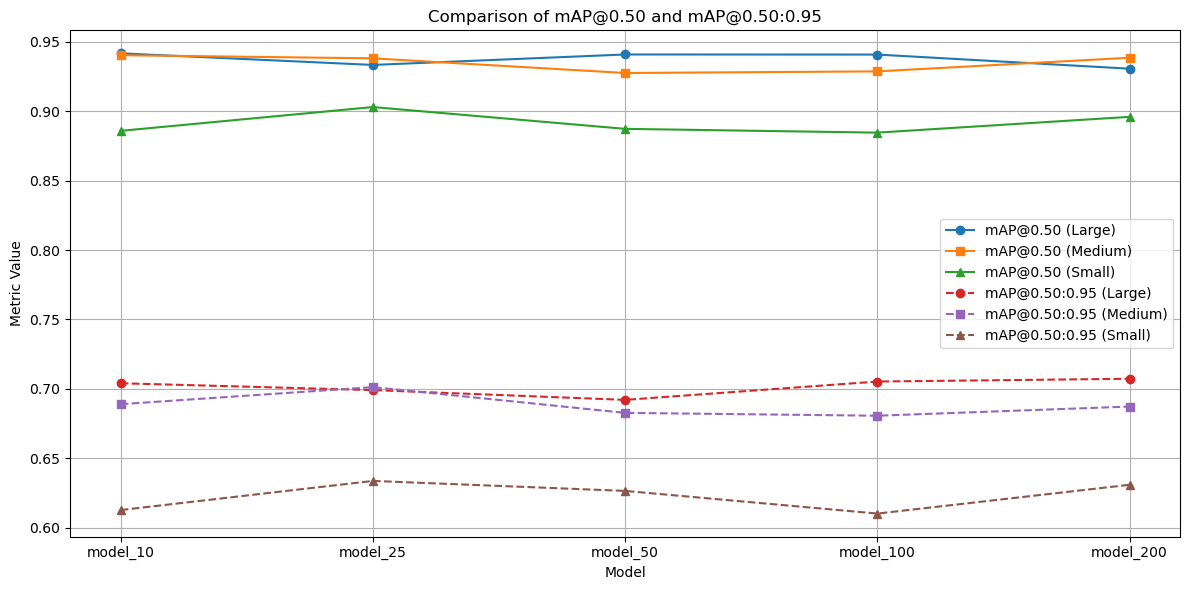

In [23]:

# Convert them to DataFrames
df_l = pd.DataFrame(evaluation_results_l)
df_m = pd.DataFrame(evaluation_results_m)
df_s = pd.DataFrame(evaluation_results_s)

# Specific model labels
model_labels = ['model_10', 'model_25', 'model_50', 'model_100', 'model_200']

# Plotting
plt.figure(figsize=(12, 6))

# Plot for mAP@0.50
plt.plot(df_l['mAP@0.50'], '-o', label='mAP@0.50 (Large)')
plt.plot(df_m['mAP@0.50'], '-s', label='mAP@0.50 (Medium)')
plt.plot(df_s['mAP@0.50'], '-^', label='mAP@0.50 (Small)')

# Plot for mAP@0.50:0.95
plt.plot(df_l['mAP@0.50:0.95'], '--o', label='mAP@0.50:0.95 (Large)')
plt.plot(df_m['mAP@0.50:0.95'], '--s', label='mAP@0.50:0.95 (Medium)')
plt.plot(df_s['mAP@0.50:0.95'], '--^', label='mAP@0.50:0.95 (Small)')

# Setting the labels and title
plt.title('Comparison of mAP@0.50 and mAP@0.50:0.95')
plt.xlabel('Model')
plt.ylabel('Metric Value')
plt.xticks(range(len(df_l)), model_labels)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
